# exploratory data analysis of healthcare dataset
# Demographic and Healthcare Analysis
## Data Loading
We will use census_2011.csv with:
- hospitals.csv
- government_hospitals.csv
- Employees State Insurance Corporation.csv

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import zscore

In [2]:
df=pd.read_csv("census_2011.csv")
df1 = pd.read_csv('hospitals.csv')
df2 = pd.read_csv('government_hospitals.csv', skiprows=1)
df3 = pd.read_csv('Employees State Insurance Corporation.csv',header=1,index_col=0)

In [3]:
df.head(10)  # census csv first 10 values 

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0
5,6,JAMMU AND KASHMIR,Rajouri,642415.0,345351.0,297064.0,364109.0,224469.0,139640.0,48157.0,...,NaN,443.0,42.0,NaN,100.0,72.0,22.0,94.0,15.0,786.0
6,7,JAMMU AND KASHMIR,Kathua,616435.0,326109.0,290326.0,389204.0,228499.0,160705.0,141224.0,...,174.0,514.0,54.0,69.0,123.0,78.0,52.0,130.0,28.0,936.0
7,8,JAMMU AND KASHMIR,Baramula,1008039.0,534733.0,473306.0,NaN,337170.0,207979.0,1476.0,...,254.0,1049.0,155.0,190.0,345.0,NaN,78.0,255.0,64.0,2100.0
8,9,JAMMU AND KASHMIR,Bandipore,392232.0,207680.0,184552.0,185979.0,117058.0,68921.0,392.0,...,11.0,NaN,2.0,2.0,4.0,3.0,3.0,6.0,0.0,45.0
9,10,JAMMU AND KASHMIR,Srinagar,1236829.0,651124.0,585705.0,748584.0,431746.0,316838.0,1068.0,...,668.0,1095.0,319.0,380.0,699.0,240.0,370.0,610.0,445.0,3099.0


In [4]:
df.columns # ccolumns of census csv

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [5]:
df.describe()

,District code,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,Male_SC,Female_SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
count,640.000000,6.100000e+02,6.100000e+02,6.070000e+02,6.040000e+02,6.090000e+02,6.130000e+02,6.050000e+02,6.170000e+02,6.080000e+02,...,607.000000,610.000000,611.000000,605.000000,616.000000,607.000000,610.000000,617.000000,610.000000,608.000000
mean,320.500000,1.852620e+06,9.685726e+05,9.139882e+05,1.190550e+06,6.739088e+05,5.129481e+05,3.177854e+05,1.624509e+05,1.544700e+05,...,792.028007,1676.009836,288.960720,213.919008,513.099026,197.375618,264.191803,463.019449,283.934426,3334.167763
std,184.896367,1.435578e+06,7.926455e+05,7.479293e+05,1.050630e+06,5.683384e+05,4.801441e+05,3.172010e+05,1.625607e+05,1.537418e+05,...,1059.010710,1669.641260,641.765892,370.466703,985.702797,433.595214,599.182627,1023.577867,1073.822380,4683.995495
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,2.614000e+03,1.822000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
25%,160.750000,8.148625e+05,4.180382e+05,3.986990e+05,4.796545e+05,2.695820e+05,2.009450e+05,8.799100e+04,4.251300e+04,4.411825e+04,...,236.000000,588.000000,59.000000,23.000000,93.500000,19.000000,21.000000,44.000000,18.000000,1053.500000
50%,320.500000,1.557367e+06,7.939620e+05,7.556020e+05,9.793575e+05,5.507160e+05,4.048610e+05,2.463370e+05,1.252140e+05,1.181440e+05,...,507.000000,1196.000000,144.000000,107.000000,274.000000,84.000000,84.000000,188.000000,61.500000,2291.500000
75%,480.250000,2.565248e+06,1.318615e+06,1.253832e+06,1.602260e+06,9.203140e+05,6.568420e+05,4.550620e+05,2.284310e+05,2.163095e+05,...,939.000000,2224.250000,293.000000,253.000000,562.250000,216.000000,293.000000,509.000000,212.750000,3985.250000
max,640.000000,1.000978e+07,5.865078e+06,5.195070e+06,8.227161e+06,4.591396e+06,3.635765e+06,2.464032e+06,1.266504e+06,1.197528e+06,...,10334.000000,13483.000000,10835.000000,3595.000000,14430.000000,5027.000000,7597.000000,12624.000000,18289.000000,60163.000000


## Basic thing in data analysis
1. handling missing value
2. explore about categorical and numeric variable
3. finding realationship b/w features
4. handling outliers

# handling missing values 
1. handling missing values of census_2011.csv

In [6]:
# checkinh how much mull values are there in each column
df.isnull().sum()


District code                     0
State name                        0
District name                     0
Population                       30
Male                             30
                                 ..
Power_Parity_Rs_330000_425000    33
Power_Parity_Rs_425000_545000    30
Power_Parity_Rs_330000_545000    23
Power_Parity_Above_Rs_545000     30
Total_Power_Parity               32
Length: 118, dtype: int64

# Heat map for checking null values


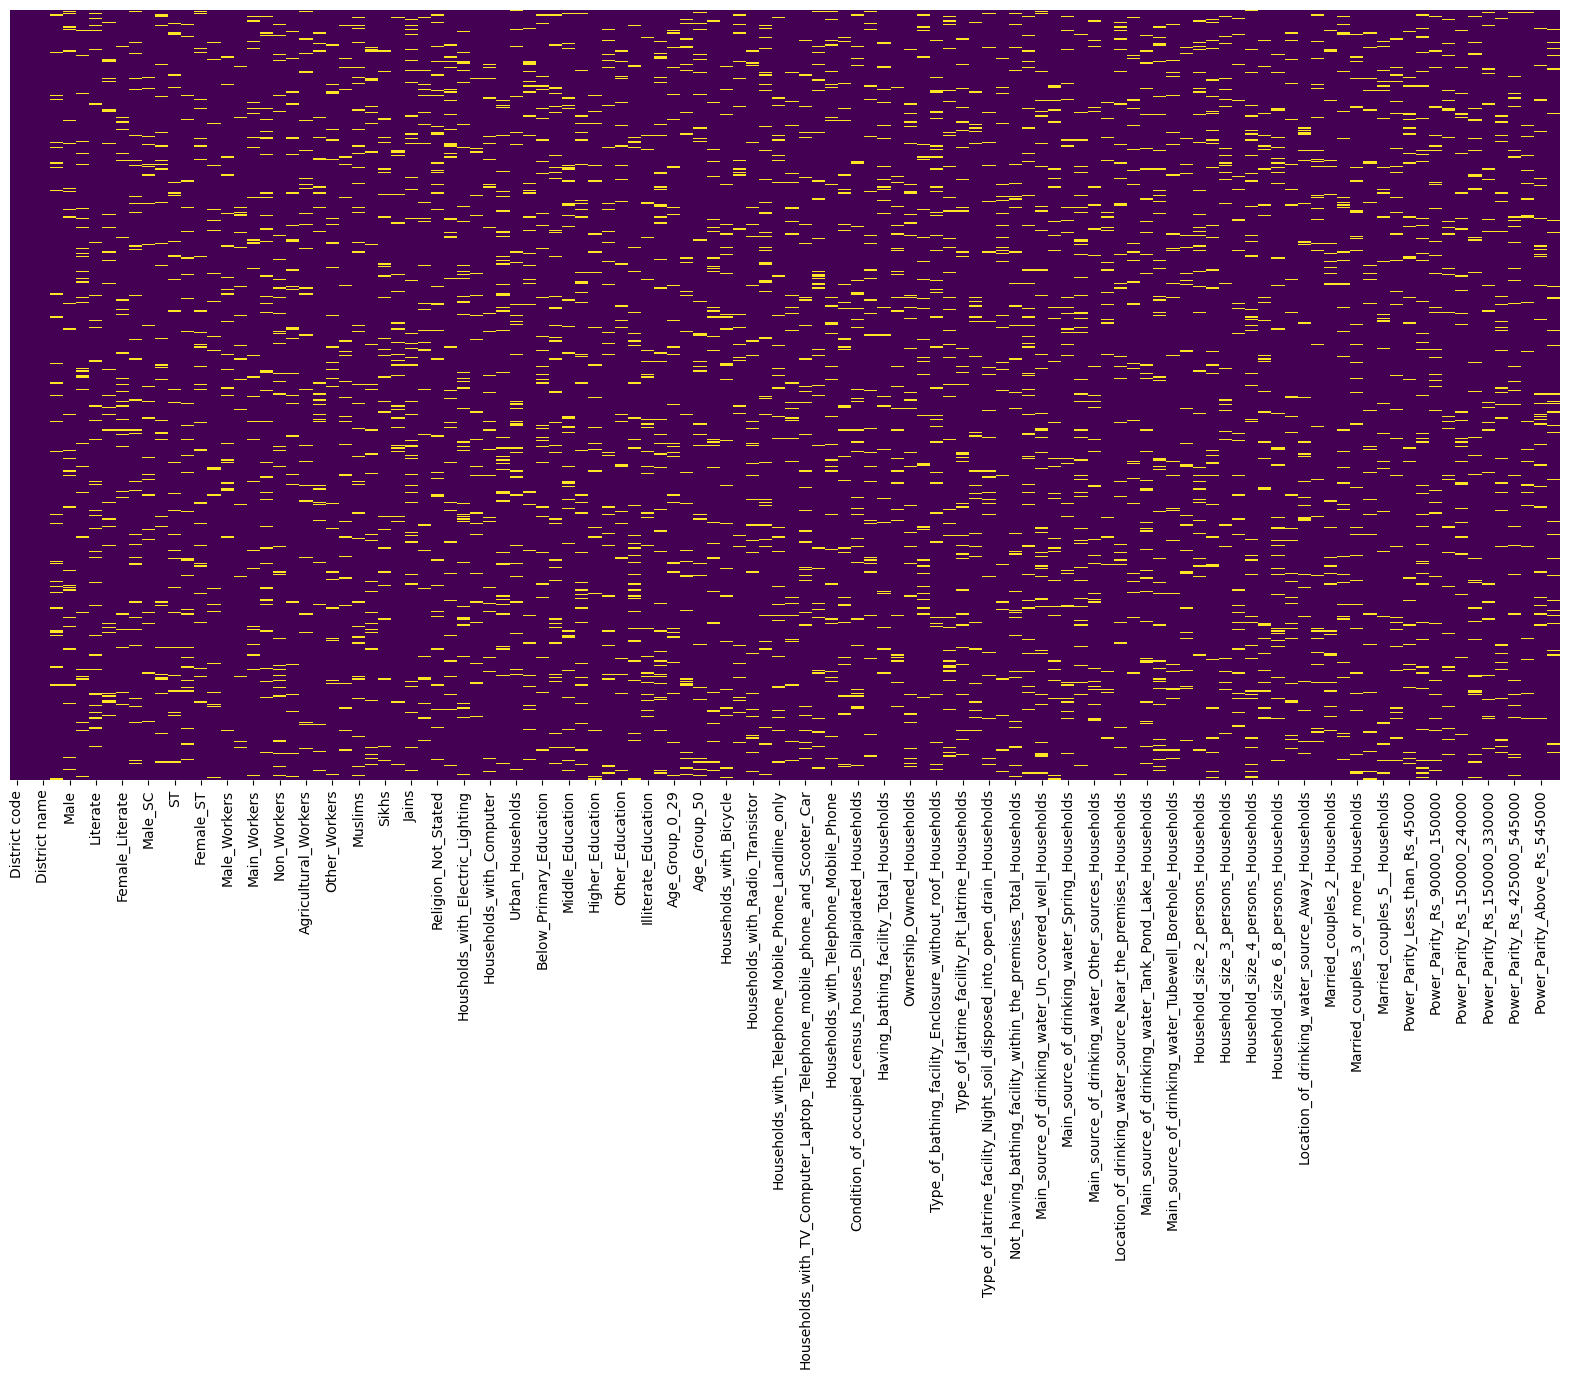

In [7]:
cols_to_visualize = df.columns  # Adjust this as needed
plt.figure(figsize=(20, 10))  # Adjust figure size
sns.heatmap(df[cols_to_visualize].isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

# removing null value and recheking it by graphs

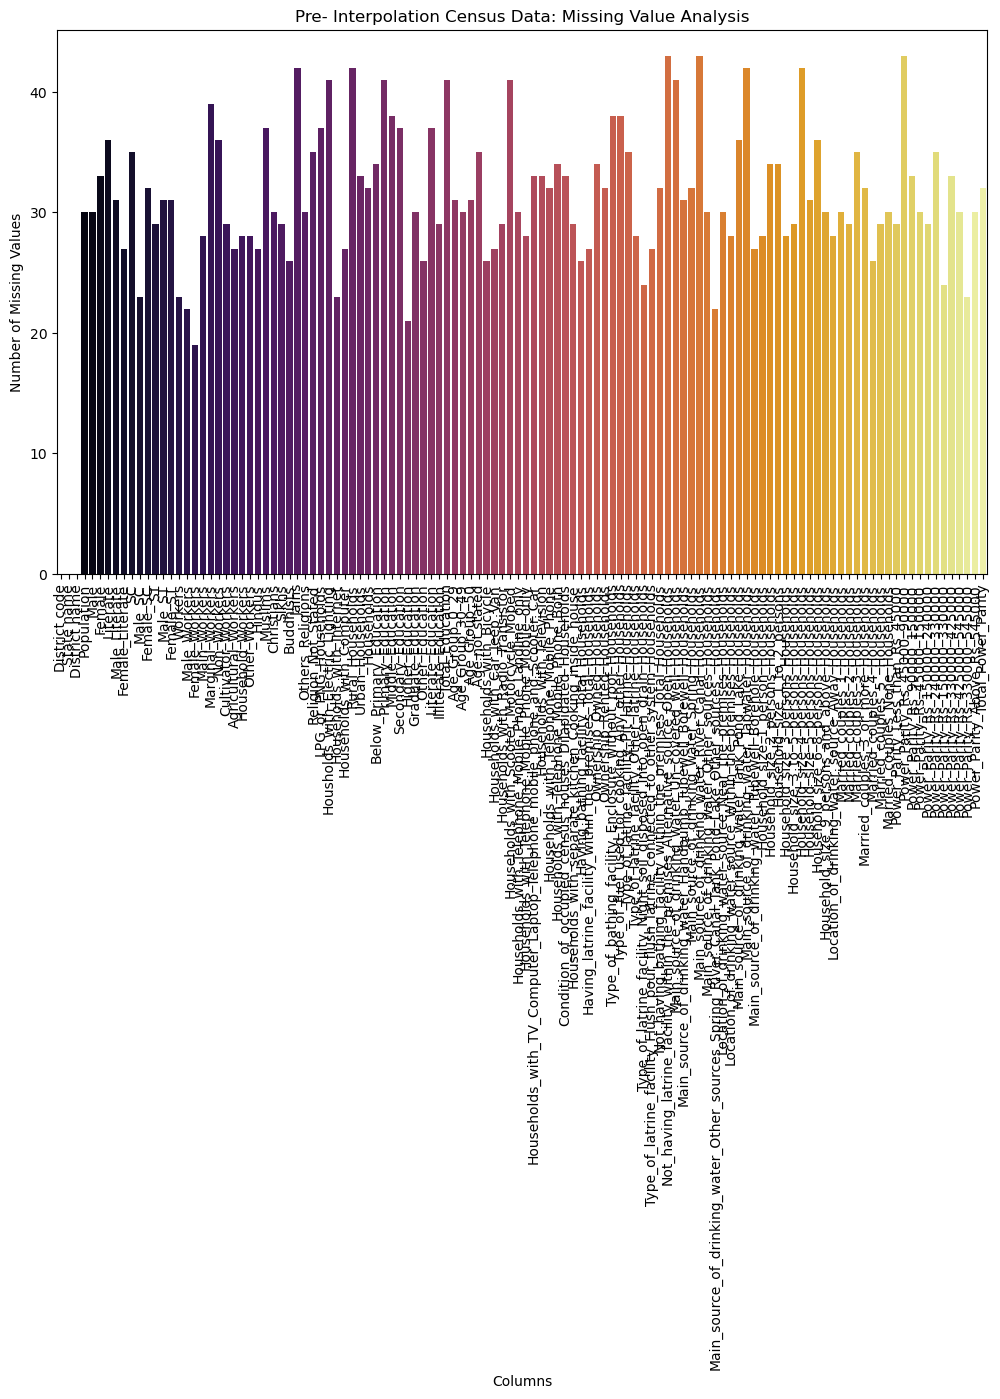

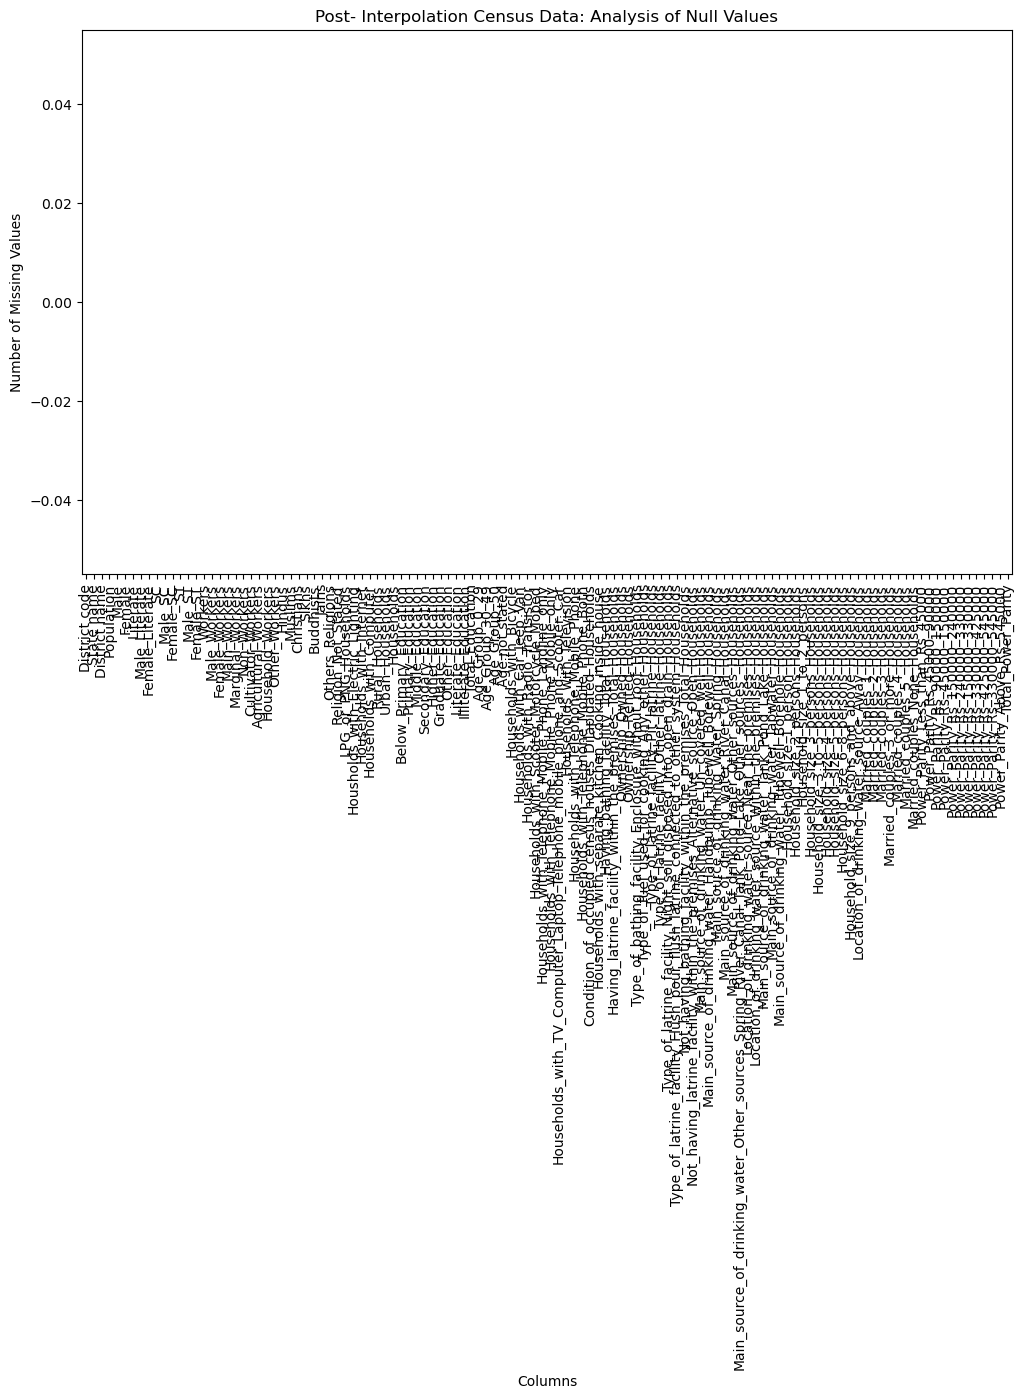

In [8]:
def plot_missing_values(df4, title, before_imputation=True):
    missing_values = df4.isnull().sum()
    
    # Determine color palette based on before_imputation flag
    palette = 'inferno' if before_imputation else 'Greens'
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x=missing_values.index, y=missing_values.values, palette=palette)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    
    # Adjust margins and layout
    plt.subplots_adjust(bottom=0.2)  # Increase bottom margin if needed
    
    plt.show()
# Plot before interpolation

plot_missing_values(df, "Pre- Interpolation Census Data: Missing Value Analysis", before_imputation=True)

# Perform interpolation  (assuming filling with mean for numerical columns)

numeric_columns = df.select_dtypes(include=np.number).columns
# Forward fill numeric columns first
df[numeric_columns] = df[numeric_columns].ffill()

# Then backward fill to handle remaining NaN values
df[numeric_columns] = df[numeric_columns].bfill()


# Plot after imputation
plot_missing_values(df, "Post- Interpolation Census Data: Analysis of Null Values", before_imputation=False)

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

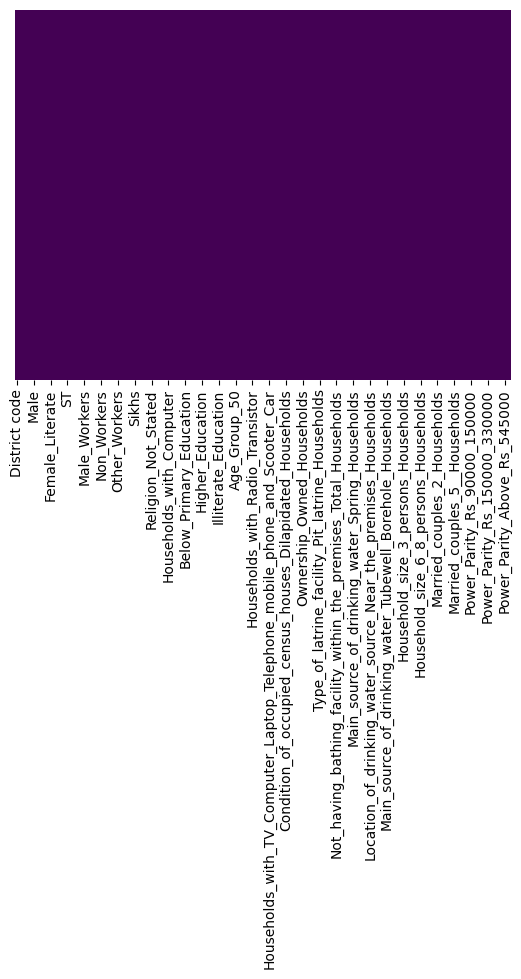

In [9]:
# checking by heatmap 
sns.heatmap(df[cols_to_visualize].isnull(), yticklabels=False, cbar=False, cmap="viridis")
df.isnull().sum()

### Working on other csv file which we will use further to find relationships 

In [10]:
df1.head()


,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [11]:
df2.head()


,Unnamed: 0,No.,Beds,No..1,Beds.1,Unnamed: 5
0,Andhra Pradesh,193,6480,65,16658,01.01.2017
1,Arunachal Pradesh*,208,2136,10,268,31.12.2017
2,Assam,1176,10944,50,6198,31.12.2017
3,Bihar,930,6083,103,5936,31.12.2016
4,Chhattisgarh,169,5070,45,4342,01.01.2016


In [12]:
df3.head()

,States /UTs,Total No. of Hospital,Total No. of Beds
S. No.,,,
1,Andhra Pradesh,5.0,345.0
2,Assam,1.0,75.0
3,Bihar,3.0,50.0
4,Chandigarh [Adm.],1.0,70.0
5,Chhattisgarh,0.0,0.0


In [13]:
df1.describe()

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
count,37,37,37,30,37,37,37
unique,37,35,30,24,25,37,37
top,Andaman & Nicobar Islands,40,2,1,15,34,1246
freq,1,2,4,4,3,1,1


In [14]:
df2.describe()

,No.,Beds,No..1,Beds.1
count,37.000000,37.000000,37.000000,37.000000
mean,1070.810811,15112.864865,203.891892,23306.648649
std,3278.430865,45752.664986,616.352568,70502.578529
min,0.000000,0.000000,0.000000,0.000000
25%,24.000000,630.000000,14.000000,1393.000000
50%,273.000000,5805.000000,59.000000,5228.000000
75%,705.000000,10944.000000,149.000000,18819.000000
max,19810.000000,279588.000000,3772.000000,431173.000000


In [15]:
df3.describe()

,Total No. of Hospital,Total No. of Beds
count,30.000000,30.000000
mean,10.066667,1317.666667
std,27.064334,3589.889100
min,0.000000,0.000000
25%,1.000000,50.000000
50%,4.500000,335.000000
75%,9.500000,1111.000000
max,151.000000,19765.000000


In [16]:
df1.isnull().sum()

Unnamed: 0      0
PHC             0
CHC             0
SDH             7
DH              0
Hospitals       0
HospitalBeds    0
dtype: int64

# handling null values of df1 :_ hospital

In [17]:
df1[['PHC', 'CHC', 'SDH', 'DH', 'Hospitals', 'HospitalBeds']] = df1[['PHC', 'CHC', 'SDH', 'DH', 'Hospitals', 'HospitalBeds']].apply(pd.to_numeric, errors='coerce')
def heatmaps(df1,title,before_imputation=True):
    sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap="viridis")
    plt.title(title)
    plt.show

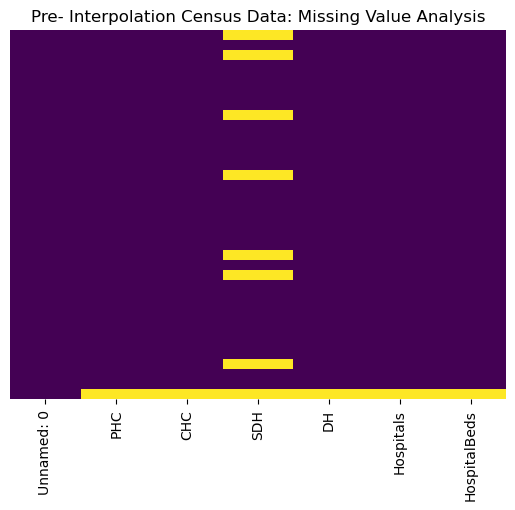

In [18]:
heatmaps(df1,"Pre- Interpolation Census Data: Missing Value Analysis",before_imputation=True)
numeric_columns = df1.select_dtypes(include=np.number).columns
# Forward fill numeric columns first
df1[numeric_columns] = df1[numeric_columns].ffill()
# Then backward fill to handle remaining NaN values
df1[numeric_columns] = df1[numeric_columns].bfill()


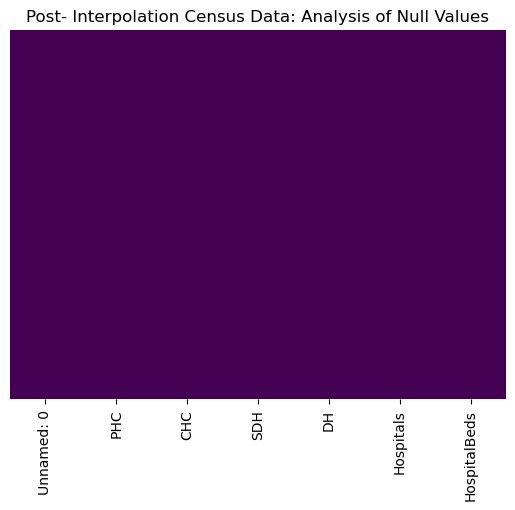

In [19]:
heatmaps(df1, "Post- Interpolation Census Data: Analysis of Null Values",before_imputation=False)


# handing outliers of census_2011.csv
### as there are many columns in census csv we will just remove outliers of column which we can use in making relationships
- for proper relationship the outliers of each file should be removed

In [20]:
def outliers_zscore_quantile(df, columns, threshold=3):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        # Calculate Z-scores for the column
        col_zscore = zscore(df[col].dropna())
        # Get the index of rows without outliers
        valid_indices = df[col].dropna().index[abs(col_zscore) < threshold]
        # Filter the dataframe
        df = df.loc[valid_indices]
    return df

# Handling outlier related to households

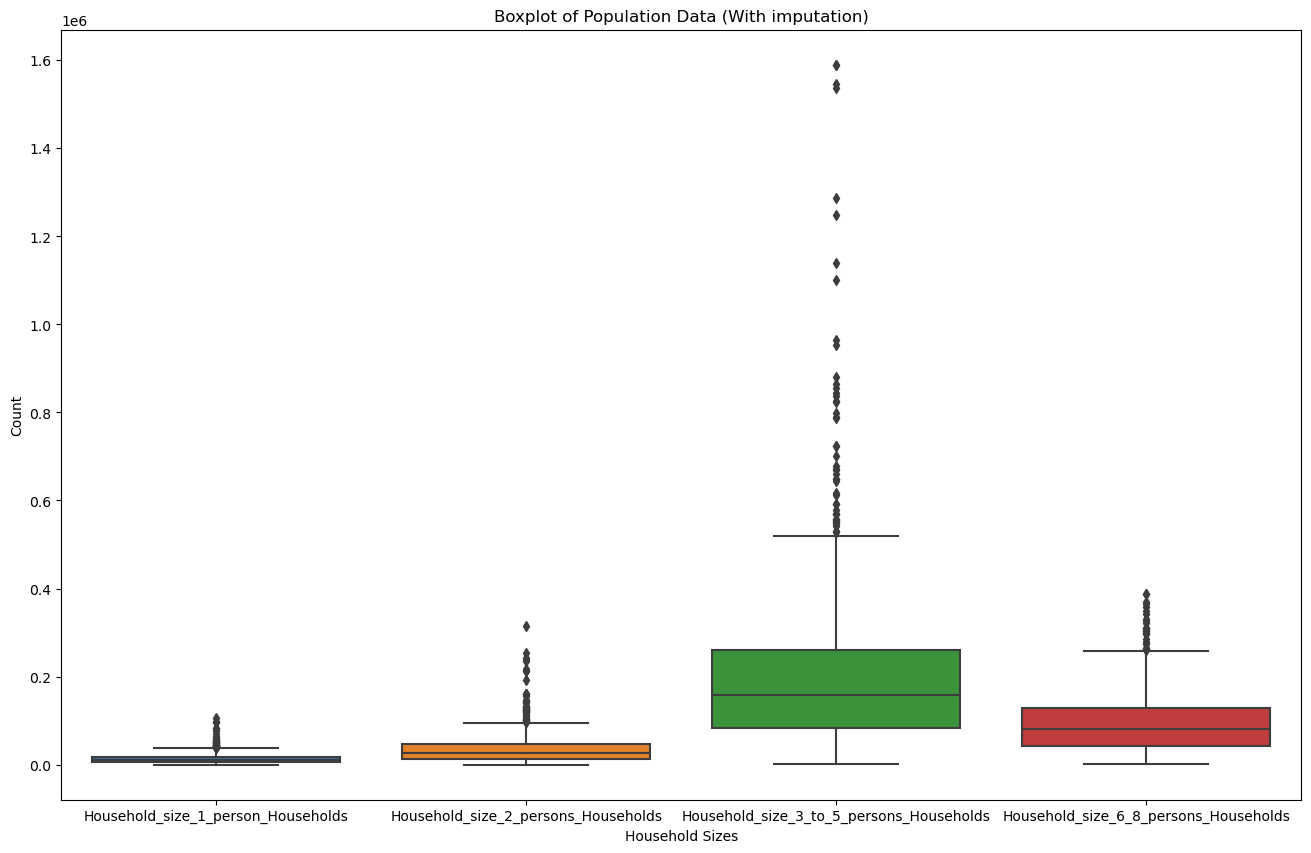

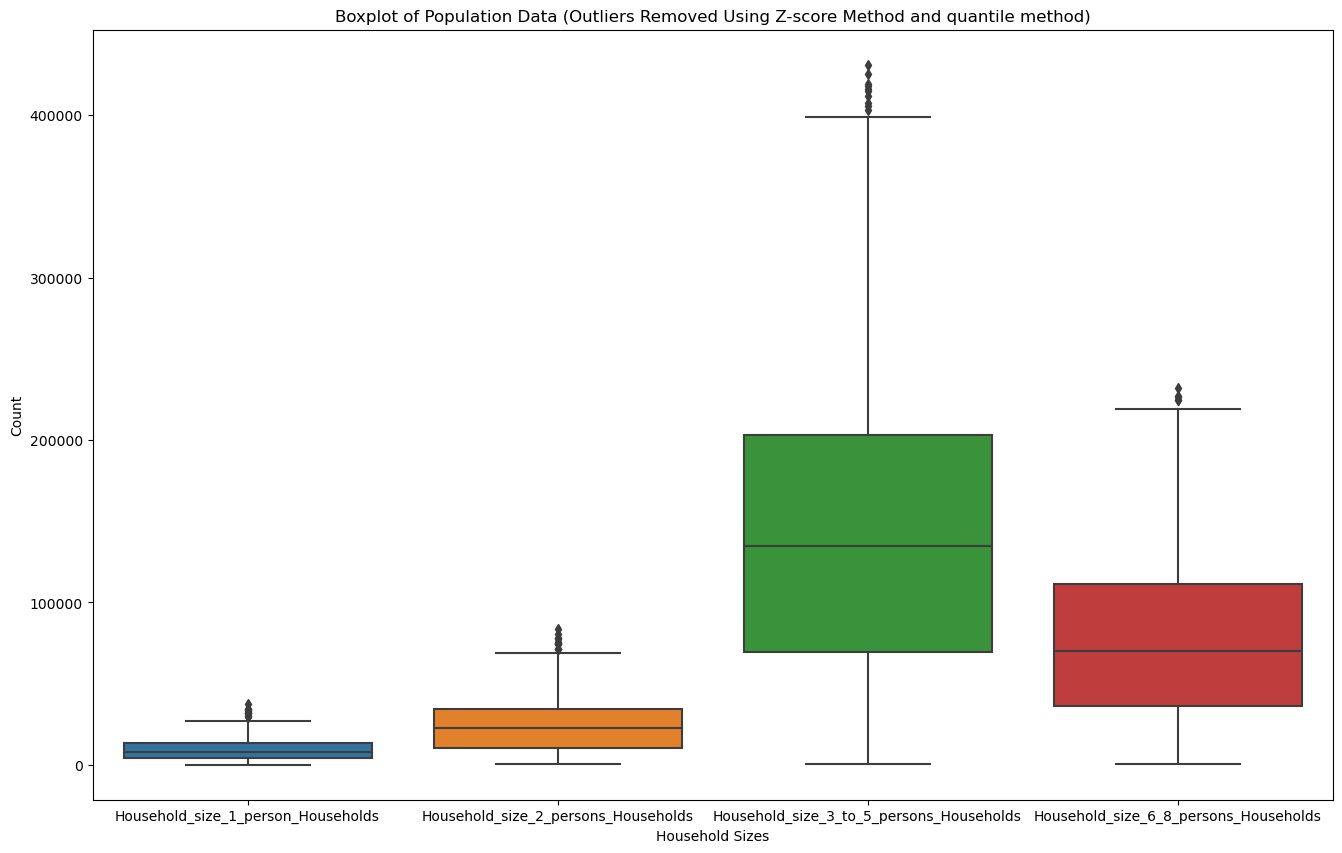

In [21]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df[['Household_size_1_person_Households', 'Household_size_2_persons_Households','Household_size_3_to_5_persons_Households', 'Household_size_6_8_persons_Households']])
plt.title('Boxplot of Population Data (With imputation)')
plt.xlabel('Household Sizes')
plt.ylabel('Count')
plt.show()
df_cleaned = outliers_zscore_quantile(df, ['Household_size_1_person_Households', 'Household_size_2_persons_Households','Household_size_3_to_5_persons_Households','Household_size_6_8_persons_Households'])

plt.figure(figsize=(16, 10))
sns.boxplot(data=df_cleaned[['Household_size_1_person_Households', 'Household_size_2_persons_Households','Household_size_3_to_5_persons_Households','Household_size_6_8_persons_Households']])
plt.title('Boxplot of Population Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('Household Sizes')
plt.ylabel('Count')
plt.show()


# Handling outlier related to education

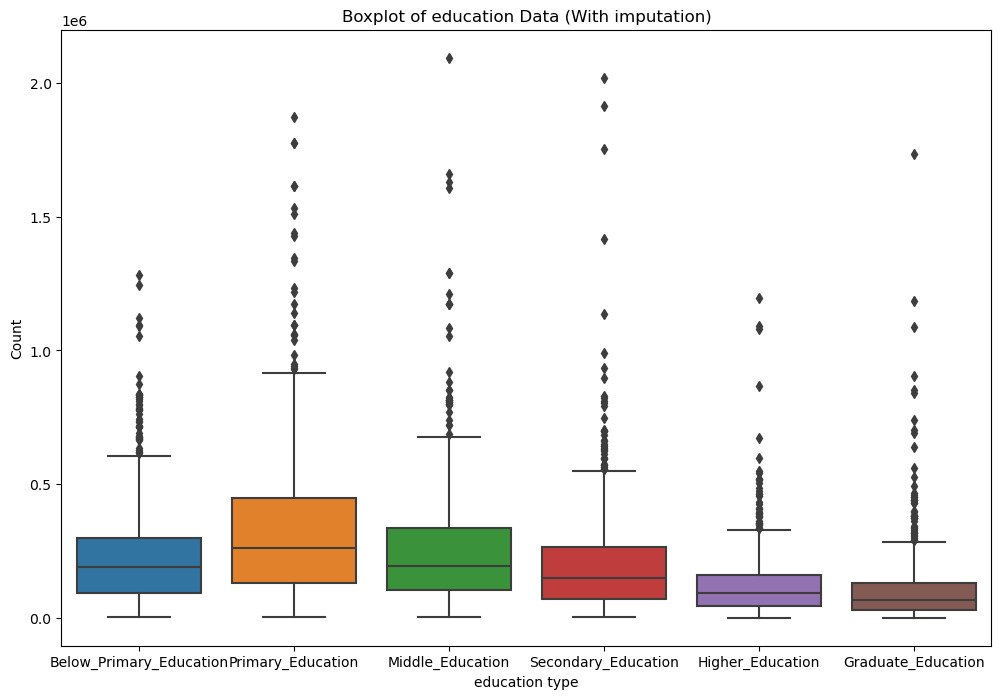

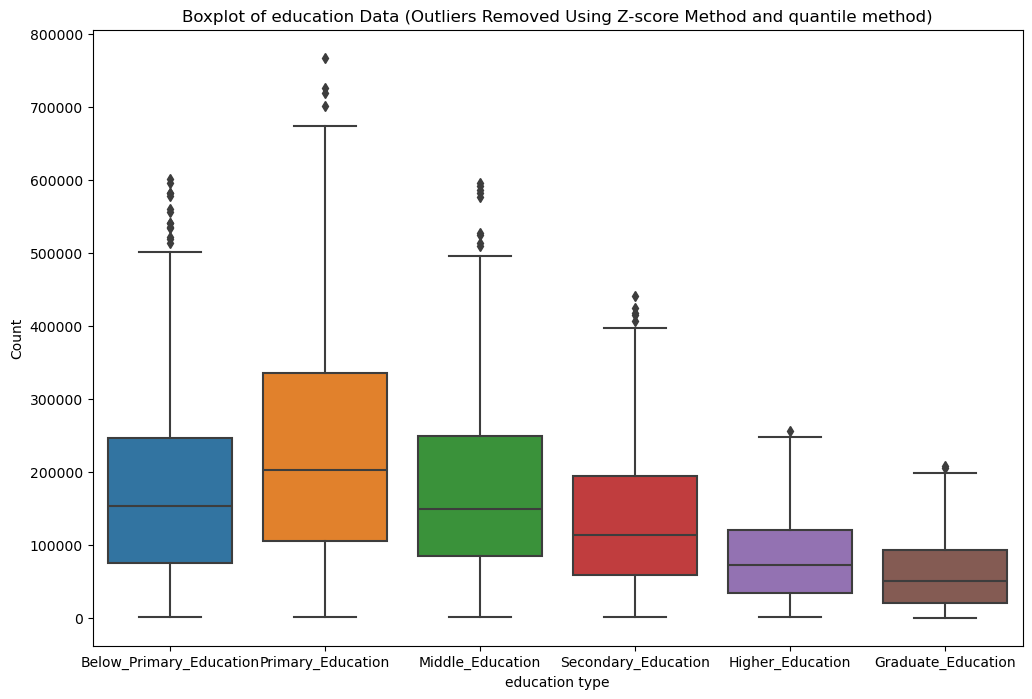

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education']])
plt.title('Boxplot of education Data (With imputation)')
plt.xlabel('education type')
plt.ylabel('Count')
plt.show()
df_cleaned1 = outliers_zscore_quantile(df,['Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education'])

plt.figure(figsize=(12,8))
sns.boxplot(data=df_cleaned1[['Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education']])
plt.title('Boxplot of education Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('education type')
plt.ylabel('Count')
plt.show()


## handling outliers of others dataset before determining relationships

### hospital.csv 

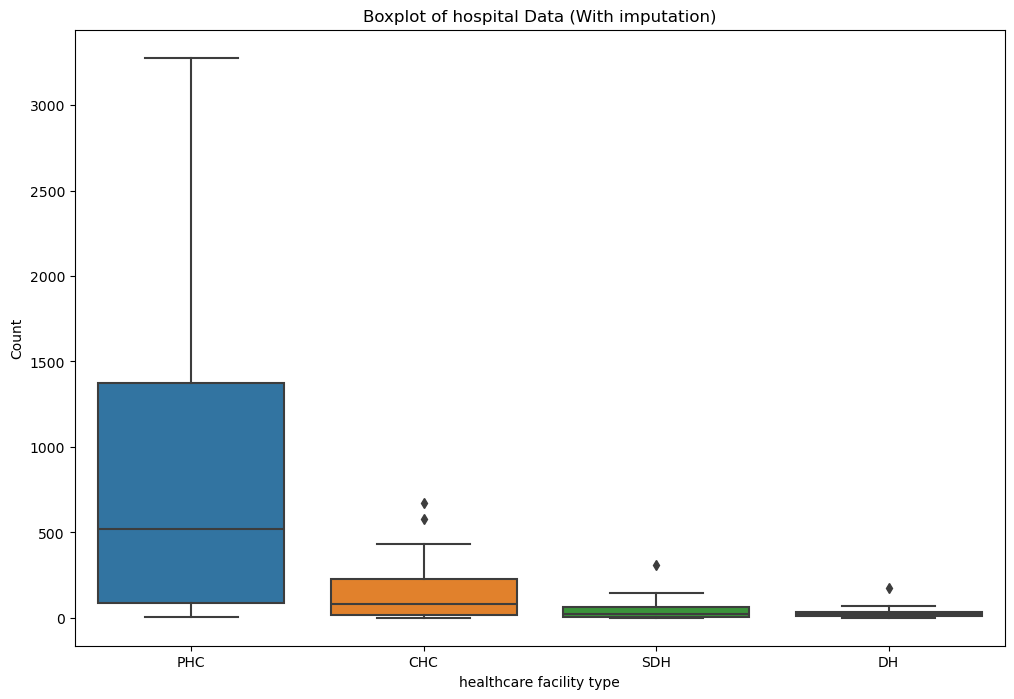

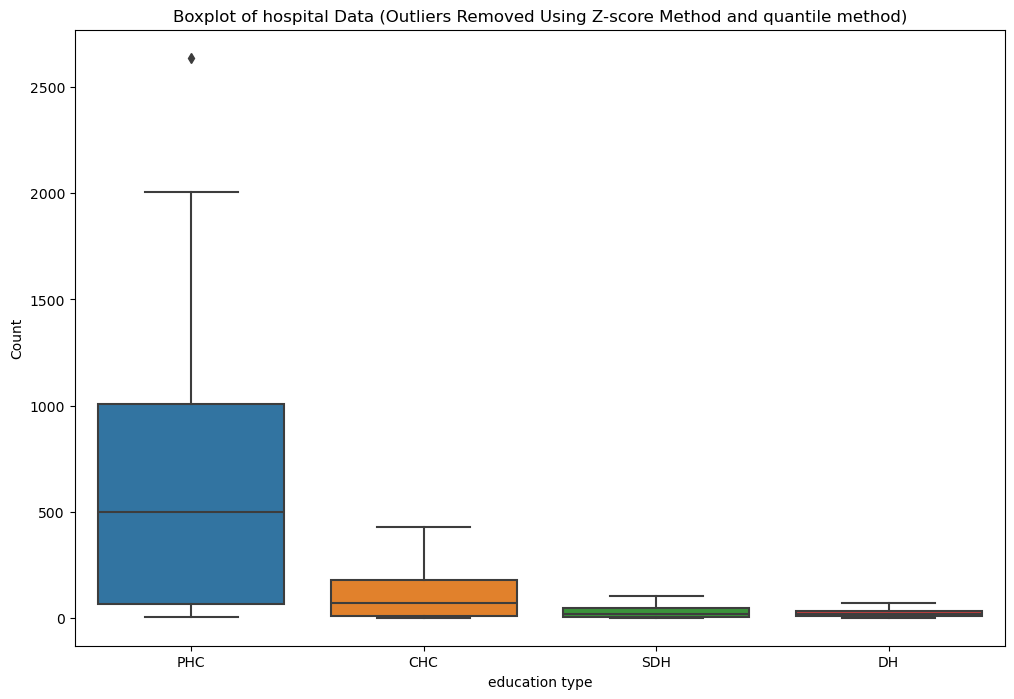

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df1[['PHC', 'CHC', 'SDH', 'DH']])
plt.title('Boxplot of hospital Data (With imputation)')
plt.xlabel('healthcare facility type')
plt.ylabel('Count')
plt.show()
df1_cleaned = outliers_zscore_quantile(df1,['PHC', 'CHC', 'SDH', 'DH'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df1_cleaned[['PHC', 'CHC', 'SDH', 'DH']])
plt.title('Boxplot of hospital Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('education type')
plt.ylabel('Count')
plt.show()
df1_cleaned.rename(columns={'Unnamed: 0': 'State name'}, inplace=True)
df1.rename(columns={'Unnamed: 0': 'State name'}, inplace=True)



### State Insurance Corporation.csv

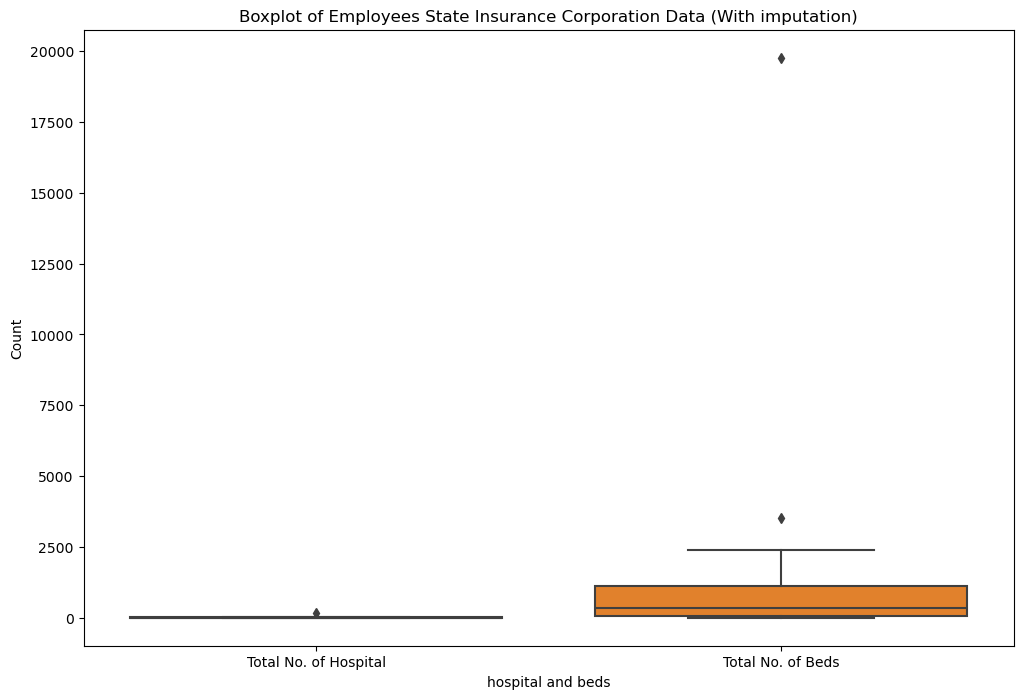

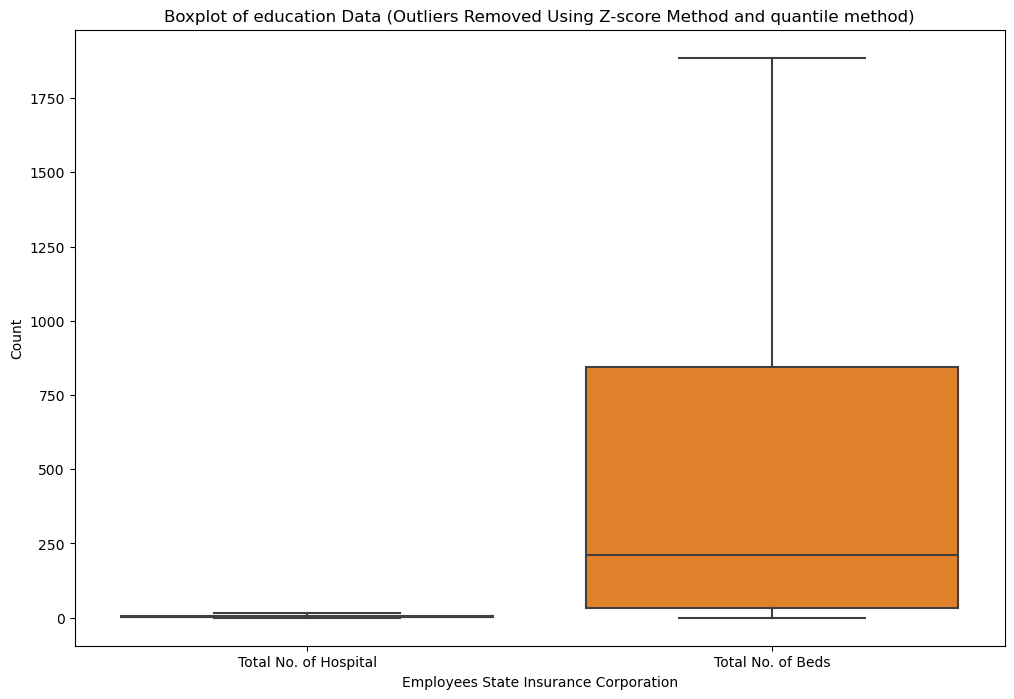

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df3[['Total No. of Hospital', 'Total No. of Beds']])
plt.title('Boxplot of Employees State Insurance Corporation Data (With imputation)')
plt.xlabel('hospital and beds')
plt.ylabel('Count')
plt.show()
df3_cleaned = outliers_zscore_quantile(df3,['Total No. of Hospital', 'Total No. of Beds'])

plt.figure(figsize=(12,8))
sns.boxplot(data=df3_cleaned[['Total No. of Hospital', 'Total No. of Beds']])
plt.title('Boxplot of education Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('Employees State Insurance Corporation')
plt.ylabel('Count')
plt.show()


### handling outliers of .government_hospitals.csv

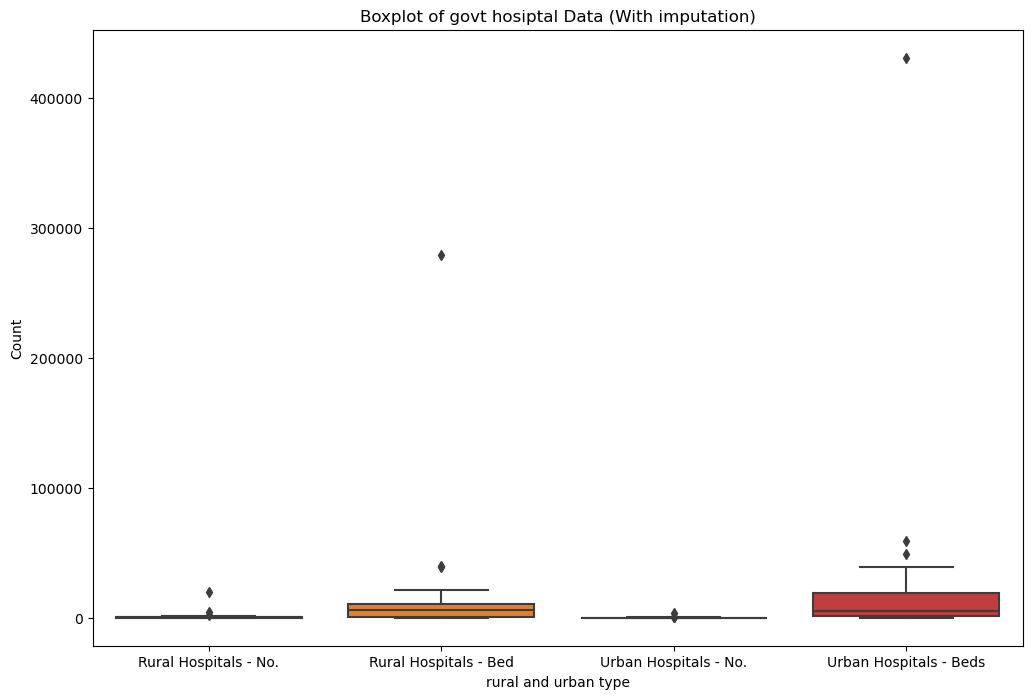

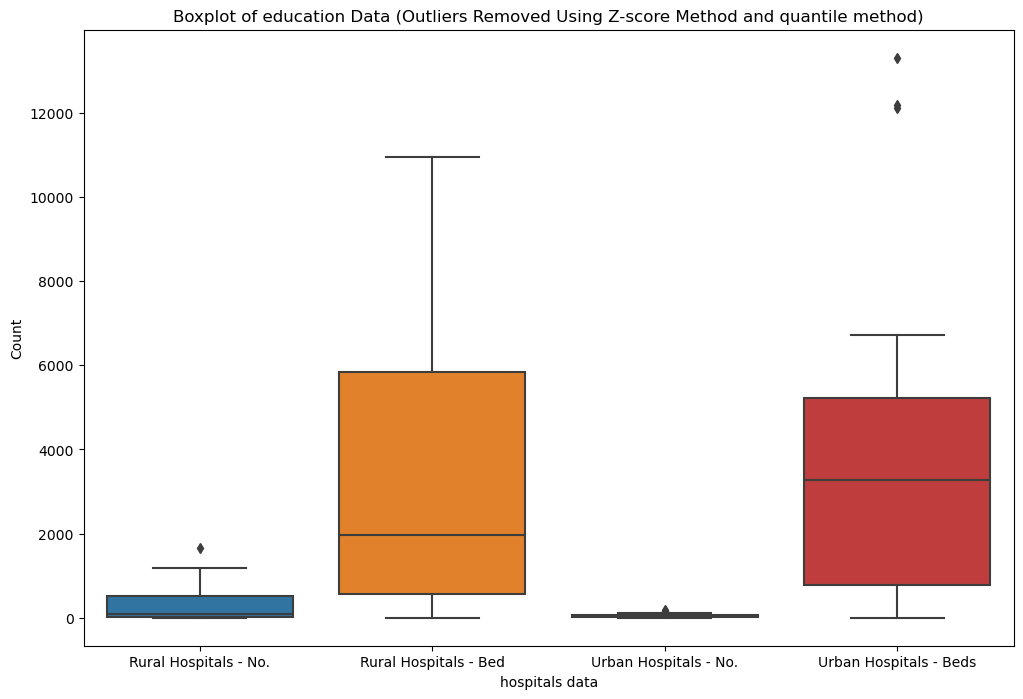

In [25]:
new_column_names = ['States/UTs', 'Rural Hospitals - No.', 'Rural Hospitals - Bed','Urban Hospitals - No.', 'Urban Hospitals - Beds', 'As on']
df2.columns = new_column_names
plt.figure(figsize=(12,8))
sns.boxplot(data=df2[['Rural Hospitals - No.', 'Rural Hospitals - Bed','Urban Hospitals - No.', 'Urban Hospitals - Beds']])
plt.title('Boxplot of govt hosiptal Data (With imputation)')
plt.xlabel('rural and urban type')
plt.ylabel('Count')
plt.show()
df2_cleaned = outliers_zscore_quantile(df2,['Rural Hospitals - No.', 'Rural Hospitals - Bed','Urban Hospitals - No.', 'Urban Hospitals - Beds'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df2_cleaned[['Rural Hospitals - No.', 'Rural Hospitals - Bed','Urban Hospitals - No.', 'Urban Hospitals - Beds']])
plt.title('Boxplot of education Data (Outliers Removed Using Z-score Method and quantile method)')

plt.xlabel('hospitals data')
plt.ylabel('Count')
plt.show()



## Understanding Data Through Analysis and Visual Insights (EDA)
- Analysising population of male and female 

In [26]:
#heading

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


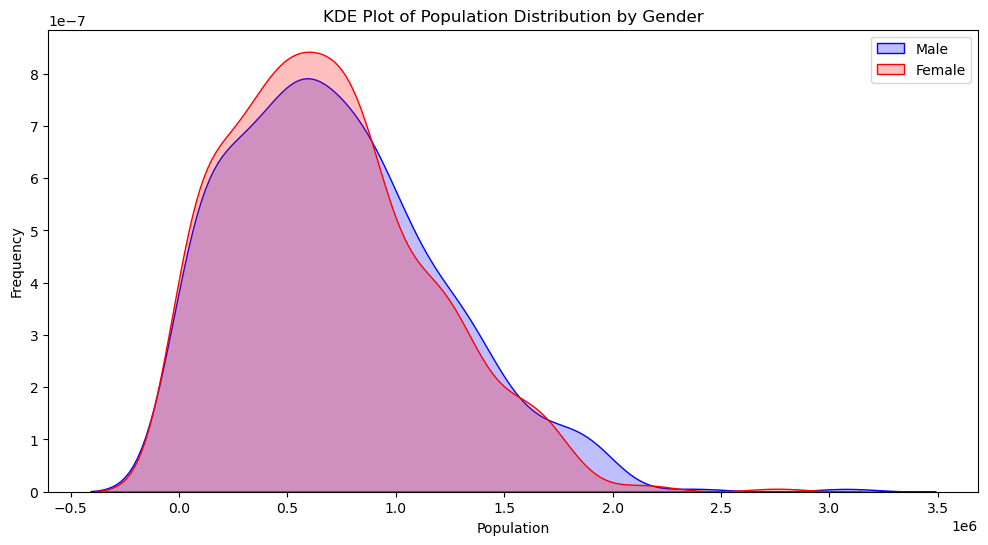

In [27]:

plt.figure(figsize=(12, 6))
plt.title('KDE Plot of Population Distribution by Gender')

sns.kdeplot(df_cleaned['Male'].dropna(), label='Male', color='blue', fill=True)

sns.kdeplot(df_cleaned['Female'].dropna(), label='Female', color='red', fill=True)

plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Population frequency Analysis:** The kde plot illustrates the frequency distribution of population sizes in the census dataset of both ganders, with population values ranging from 0 to 10 million. The majority of the data points are concentrated at lower population values, indicating a right-skewed distribution. The kernel density estimate (KDE) line further highlights this skewness, showing a peak around the lower population range and tapering off towards the higher population values.

### population state wise further can be used to determine relationship b/w population and no. of hosiptal.

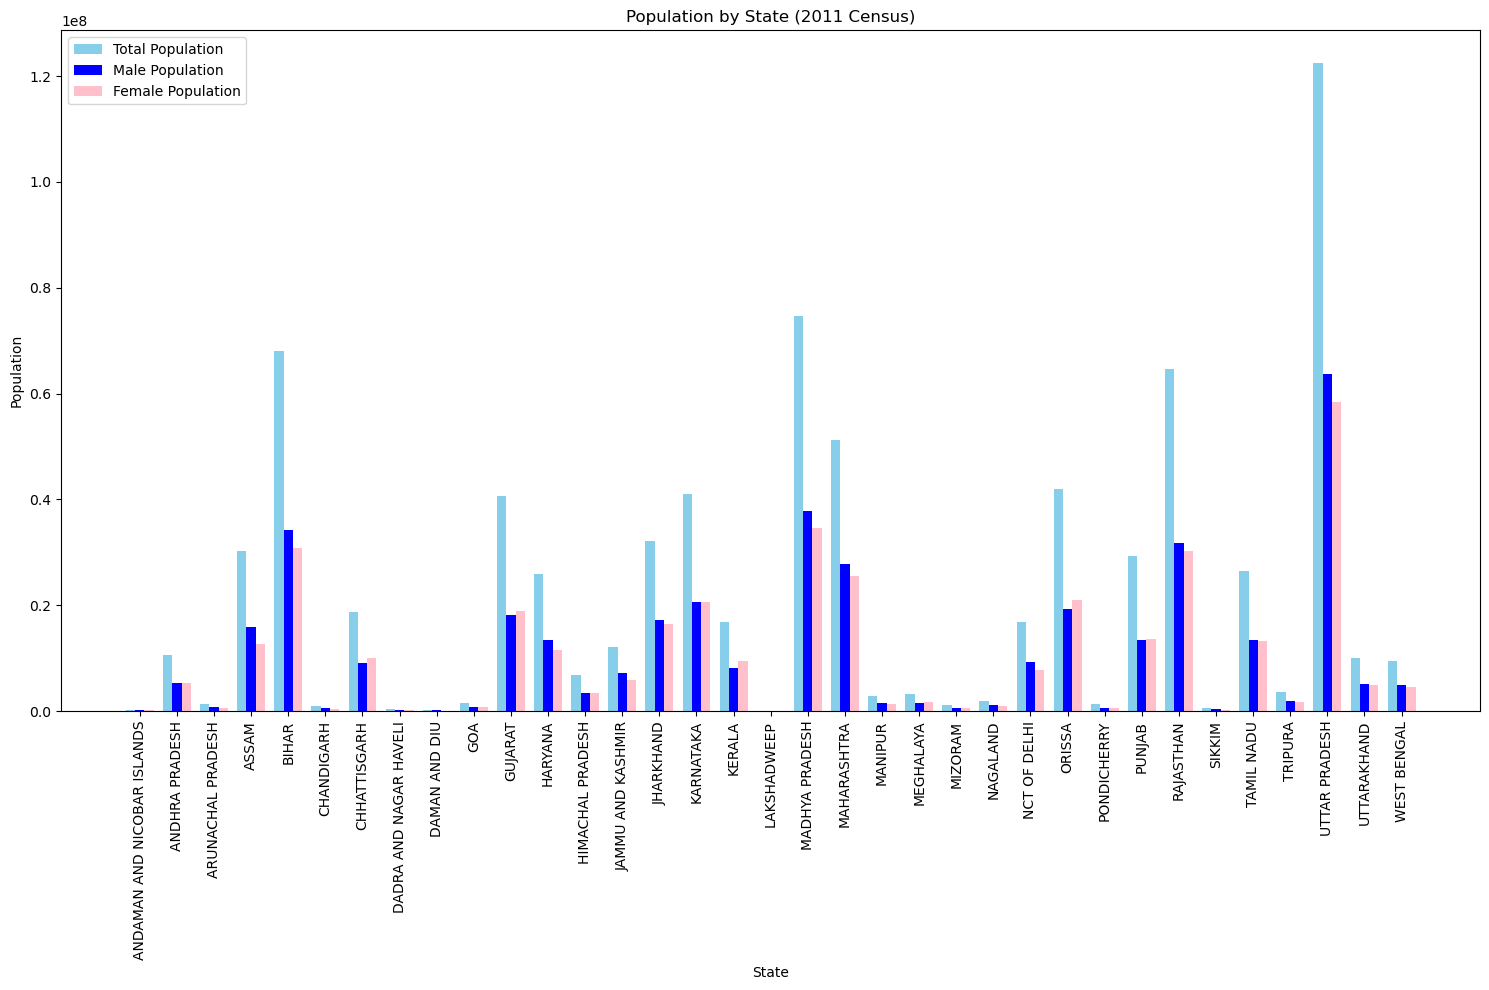

In [28]:
state_population = df_cleaned.groupby('State name').agg({
    'Population': 'sum',
    'Male': 'sum',
    'Female': 'sum'
}).reset_index()

# Plot the bar graph
plt.figure(figsize=(15, 10))
bar_width = 0.25
index = range(len(state_population))

plt.bar(index, state_population['Population'], bar_width, label='Total Population', color='skyblue')
plt.bar([i + bar_width for i in index], state_population['Male'], bar_width, label='Male Population', color='blue')
plt.bar([i + 2*bar_width for i in index], state_population['Female'], bar_width, label='Female Population', color='pink')

plt.xlabel('State')
plt.ylabel('Population')
plt.title('Population by State (2011 Census)')
plt.xticks([i + bar_width for i in index], state_population['State name'], rotation=90)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()
